In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [22]:
class KMeansClustering:
    def __init__ (self, K= 5, max_iters= 100, plot_steps= False):
        self.K = K  
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        #mean feature vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialise centroids 
        random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_sample_indices]


        # optimize
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # update centroids 
            centroids_old = self.centroids
            if self.plot_steps:
                self.plot()
            self.centroids = self._get_centroids(self.clusters)
            # check for convergence
            if self._is_converged(centroids_old, self.centroids):
                break

        #return cluster labels 
        return self._get_cluster_labels(self.clusters)
 
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self._closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
         distances = [euclidean_distance(sample, point) for point in centroids]
         closes_index = np.argmin(distances)
         return closes_index
        
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis= 0)
            centroids[cluster_index] = cluster_mean
        return centroids 
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize= (8, 6))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker= "x", color= 'black', linewidth= 2)
        
        plt.show()

In [23]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(centers= 4, n_samples= 500, n_features= 2, shuffle= True) #, random_state= 23)
clusters = len(np.unique(y))
clusters

4

In [25]:
kmeans = KMeansClustering(K= clusters, max_iters= 50, plot_steps= False)
y_pred = kmeans.predict(X)

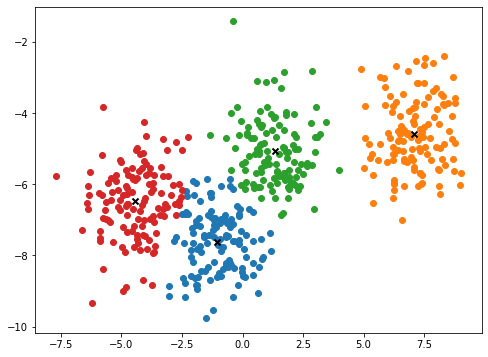

In [26]:
kmeans.plot()

In [27]:
## using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= clusters, n_init= 10)
y_pred = kmeans.fit_predict(X)

In [28]:
y_pred
kmeans.cluster_centers_ #gives the centres of the centroids
kmeans.transform(X) #gives the distance of a point from the different centroids

array([[ 3.29075004, 10.19270493,  4.44366651,  1.94557666],
       [ 4.06219463,  6.39499262,  1.28256519,  5.72483055],
       [ 1.43970225,  8.10813912,  3.74994653,  4.91466989],
       ...,
       [ 3.20090769, 10.77974246,  5.02405951,  1.0750575 ],
       [ 9.00185323,  0.3918842 ,  6.13652456, 12.02109195],
       [10.17227468,  1.59990131,  7.10181288, 13.03118504]])

In [29]:
## Finding the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5467063357237186

In [30]:
# Use in image clustering
from matplotlib.image import imread

In [31]:
# image = imread('splash.jpg')
# image.shape

In [32]:
# X = image.reshape(-1, 3)
# kmeans = KMeans(n_clusters= 8).fit(X)
# segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# segmented_img = segmented_img.reshape(image.shape)

In [33]:
## FOR PREPROCESSING
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9622222222222222

In [37]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([    ("kmeans", KMeans(n_clusters=100)),    ("log_reg", LogisticRegression()),])

In [38]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9644444444444444

In [44]:
import pandas as pd
data = pd.read_csv('insurance.txt')
y = data['charges'].to_numpy()
X = data.drop(columns= 'charges').to_numpy()
clusters = 3

In [45]:
kmeans = KMeansClustering(K= clusters, max_iters= 50, plot_steps= False)
y_pred = kmeans.predict(X)

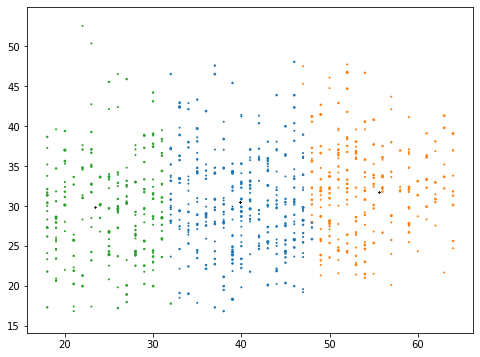

In [46]:
kmeans.plot()